<a href="https://colab.research.google.com/github/saivardhan4694/cancer-app/blob/main/Lung_Cancer_Detection_CTScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as op
op.download("https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: makkapatimrk
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset


100%|██████████| 149M/149M [00:08<00:00, 17.4MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [ ]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (10).jpg')
plt.title('Bengin Case')
plt.imshow(img, label = 'Bengin Case')

In [ ]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (10).jpg')
plt.title('Malignant Case')
plt.imshow(img)

In [ ]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (100).jpg')
plt.title('Normal Case')
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
dir = '/content/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'
img_width = 256
img_height = 256

In [ ]:
# Second section of the path
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [ ]:
random.shuffle(img_data)

In [ ]:
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)

#Convert X and Y list into array
X=np.array(x, dtype = float)
Y=np.array(y, dtype = float)

In [ ]:
# print(X[19])
print(len(X[19]))

256


In [ ]:
# Normalizing the images
for i in range(len(X)):
    X[i] = X[i]/255.0

In [ ]:
print(X[19])

[[[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 ...

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]


In [ ]:
X.shape

(1097, 256, 256, 3)

In [ ]:
x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [ ]:
model = Sequential()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # Rotate the image by up to 15 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10% of the width
    height_shift_range=0.1, # Shift the image vertically by up to 10% of the height
    shear_range=0.1,        # Shear the image by up to 10 degrees
    zoom_range=0.1,         # Zoom in or out by up to 10%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill in missing pixels with the nearest value
)

# Fit the ImageDataGenerator on your training data
datagen.fit(x_train)

# Define the number of augmented images to generate per original image
augmented_images_per_original = 6

# Generate augmented images and append them to the training data
augmented_x_train = []
augmented_y_train = []
for i in range(len(x_train)):
    for _ in range(augmented_images_per_original):
        augmented_image = datagen.flow(np.expand_dims(x_train[i], axis=0), batch_size=1)[0][0]
        augmented_x_train.append(augmented_image)
        augmented_y_train.append(y_train[i])

# Convert lists to numpy arrays
augmented_x_train = np.array(augmented_x_train)
augmented_y_train = np.array(augmented_y_train)

# Concatenate original and augmented training data
x_train_augmented = np.concatenate((x_train, augmented_x_train), axis=0)
y_train_augmented = np.concatenate((y_train, augmented_y_train), axis=0)


In [ ]:
model.add(Conv2D(128, (3, 3), padding = 'same', input_shape = X.shape[1: ], activation = 'relu'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2, seed = 12))
model.add(Dense(3000, activation = 'relu'))
model.add(Dense(1500, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3000)                │      49,155,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1500)                │       4,501,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           4,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,365,643 (207.39 MB)

 Trainable params: 54,365,643 (207.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val),epochs = 15)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 874ms/step - accuracy: 0.4469 - loss: 1.2012 - val_accuracy: 0.4716 - val_loss: 0.9663
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5857 - loss: 0.8384 - val_accuracy: 0.6648 - val_loss: 0.7604
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6696 - loss: 0.7299 - val_accuracy: 0.6932 - val_loss: 0.6670
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7607 - loss: 0.5858 - val_accuracy: 0.7557 - val_loss: 0.6098
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8099 - loss: 0.4834 - val_accuracy: 0.8068 - val_loss: 0.4734
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8469 - loss: 0.3428 - val_accuracy: 0.8977 - val_loss: 0.3039
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9440 - loss: 0.1425 - val_accuracy: 0.9545 - val_loss: 0.1408
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9586 - loss: 0.1313 - val_accuracy: 0.9148 -

In [ ]:
result = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 737ms/step


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.9874 - loss: 0.0222
Test Loss: 0.03493654727935791
Test Accuracy: 0.9818181991577148


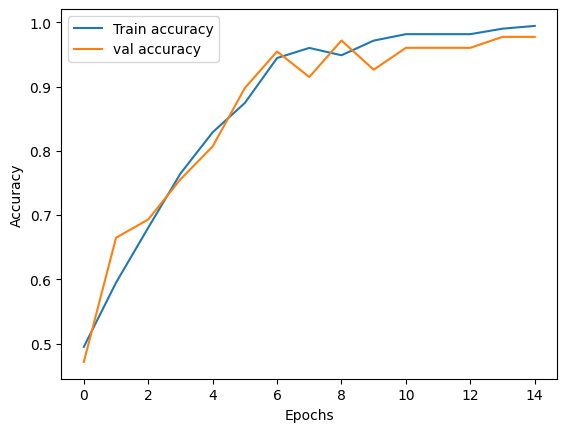

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

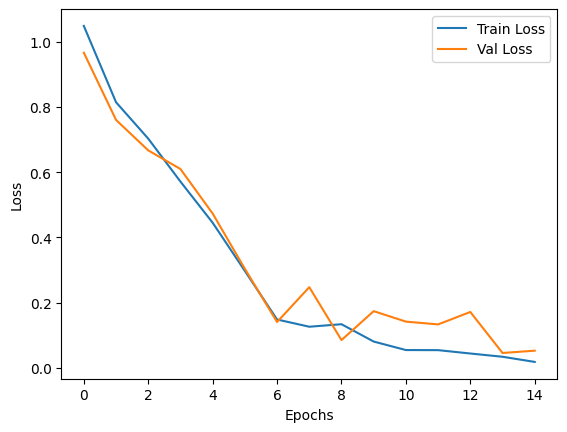

In [ ]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class Label: 2
Confidence: 1.0
Predicted Category: Normal


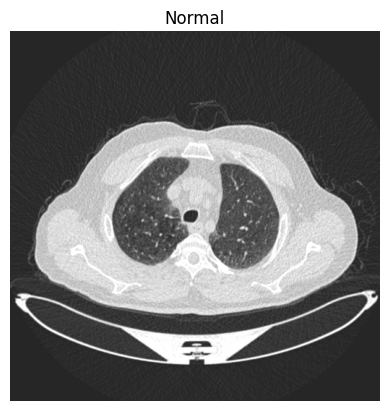

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = '/content/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (1).jpg'
img = cv2.imread(image_path)

img = cv2.resize(img, (img_height, img_width))

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class Label: 0
Confidence: 1.0
Predicted Category: Benign


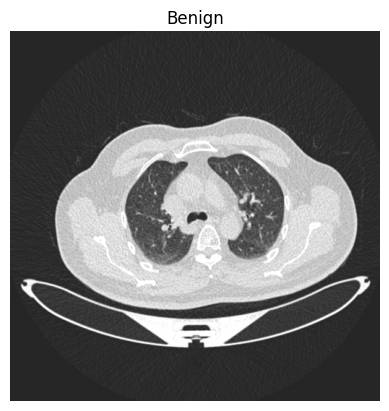

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = '/content/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (7).jpg'
img = cv2.imread(image_path)

img = cv2.resize(img, (img_height, img_width))

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class Label: 1
Confidence: 1.0
Predicted Category: Malignant


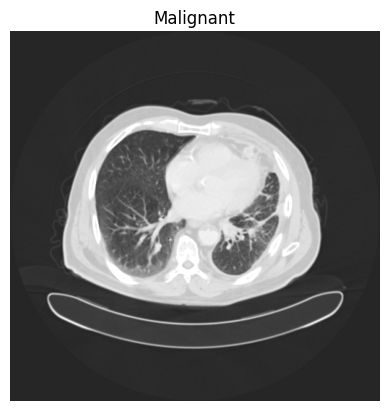

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
image_path = '/content/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (1).jpg'
img = cv2.imread(image_path)


img = cv2.resize(img, (img_height, img_width))

# Expand dimensions to create a batch of size 1
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)

# Interpret prediction
class_label = np.argmax(prediction)
confidence = prediction[0][class_label]

print("Predicted Class Label:", class_label)
print("Confidence:", confidence)

# Mapping class labels to categories
class_labels_to_categories = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}

# Display the predicted category
predicted_category = class_labels_to_categories[class_label]
print("Predicted Category:", predicted_category)

img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(predicted_category)
plt.show()

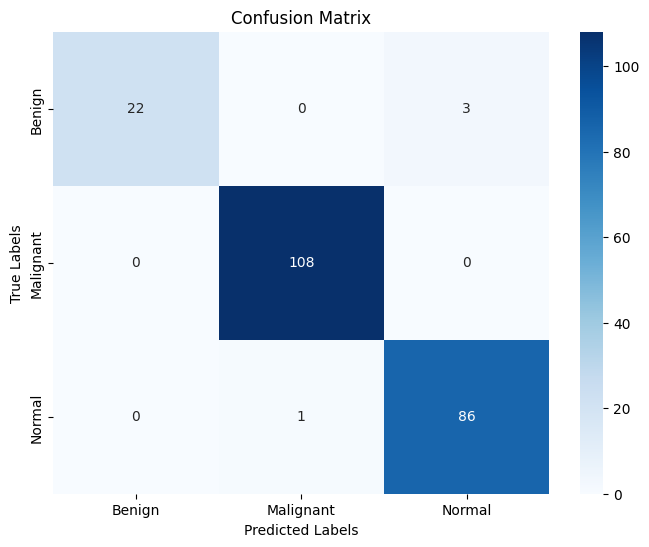

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define true labels and predicted labels
true_labels = y_test
predicted_labels = np.argmax(result, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels_to_categories.values(),
            yticklabels=class_labels_to_categories.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model
model.save("lung_cancer_detection_model(CT).h5")
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("lung_cancer_detection_model.h5")
